# **Treinando um Modelo de Regressão Logística**

## Disciplina: Inteligência Artificial 
## FATEC Ferraz de Vasconcelos
### Professora: Ana Rosa C. Tonão
#### Data de Entrega: 15/06/2025

---------

### **Instruções importantes:**

(1) Este exercício deve ser realizado em **grupos de 3 integrantes (máximo)**.

(2) **Informe seu(s) nome(s) completo(s) na tabela abaixo:**




| Alunos(as) | 
| ----------- | 
| Nome: David Souza | 
| Nome: Gustavo Yuji| 
| Nome: Roger Santos| 


(3) Utilize os arquivos de dados **"SeuNome_dataset - churn_hw2_train.csv"** e **"SeuNome_dataset - churn_hw2_test.csv"** que você preparou na Lista de Exercícios 1.

(4) **Execute o roteiro informado abaixo:**

----

**ROTEIRO**

* Leia a descrição da tarefa fornecida abaixo antes de iniciar a programação.
* Carregue os arquivos em DataFrames separados.
* Treine o modelo de regressão logística com os dados de treino.
* Aplique o modelo treinado nos dados de teste.
* Crie a matriz de confusão e o classification report.
* Explique as medidas resultantes no próprio notebook.

**Importante:** Antes de entregar o notebook final altere o nome do arquivo, incluindo o primeiro nome de um dos integrantes do grup (nome do aluno) no início.

**Exemplos:**

Ana_IIA007_1SEM2025_Lista_de_Exercícios(churn) - Parte 2.ipynb

Luiz_IIA007_1SEM2025_Lista_de_Exercícios(churn) - Parte 2.ipynb


## **Descrição dos Dados**


Para este projeto, a MegaTelCo forneceu um conjunto de dados históricos de 14.088 clientes, a partir dos quais já criou dois conjuntos de dados: um conjunto de treino (dataset - churn_hw2_train.xlsx) com 9.856 clientes e um conjunto de teste (dataset - churn_hw2_test.xlsx) com 4.232 clientes. 

No momento da coleta dos dados, cada cliente tinha permanecido na empresa ou tinha saído (churned). 

Cada cliente é descrito pelas variáveis listadas abaixo:


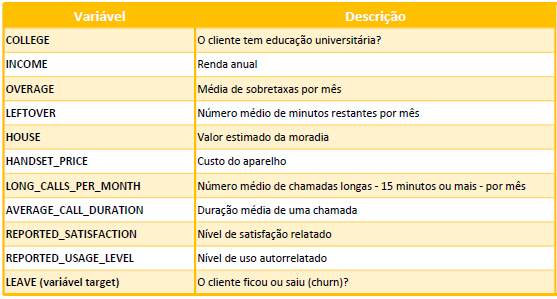

**Fonte**:

FAWCETT,T.;PROVOST,F. **Data Science para Negócios**.Rio de Janeiro, RJ:Alta Books, 2016.
    


In [9]:
import os
os.getcwd()

'd:\\titanic2'

In [12]:
os.chdir('d:\\titanicresposta')
os.getcwd()

'd:\\titanicresposta'

## **Importando as bibliotecas necessárias**


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from ydata_profiling import ProfileReport

In [15]:
import sklearn
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## **Carregando os dados de TREINO**

In [16]:
# Carregando um arquivo de texto separado por ponto e vírgula (.csv)

retention_train = pd.read_csv('d:\\titanic2\\train_final.csv')

## **Carregando os dados de TESTE**

In [17]:
# Carregando um arquivo de texto separado por ponto e vírgula (.csv)

retention_test = pd.read_csv('d:\\titanic2\\test_final.csv')

## **Inspecionando os dados de TREINO**

In [18]:
# Visualizando os dados carregados - dataset de TREINO
retention_train


,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,0,0,3,22.0,1,0,7.2500,False
1,1,1,1,38.0,1,0,71.2833,True
2,2,1,3,26.0,0,0,7.9250,True
3,3,1,1,35.0,1,0,53.1000,True
4,4,0,3,35.0,0,0,8.0500,False
...,...,...,...,...,...,...,...,...
886,886,0,2,27.0,0,0,13.0000,False
887,887,1,1,19.0,0,0,30.0000,True
888,888,0,3,NaN,1,2,23.4500,True
889,889,1,1,26.0,0,0,30.0000,False


In [19]:
retention_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Sex_female  891 non-null    bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 49.7 KB


In [20]:
# Inspecionando o dataframe de TREINO

print("Linhas, colunas: ",retention_train.shape, "\n")

print("Nomes de colunas: ",retention_train.columns, "\n")

print("Índices: ",retention_train.index, "\n")

Linhas, colunas:  (891, 8) 

Nomes de colunas:  Index(['Unnamed: 0', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female'],
      dtype='object') 

Índices:  RangeIndex(start=0, stop=891, step=1) 



## **Inspecionando os dados de TESTE**

In [21]:
# Visualizando os dados carregados - dataset de TESTE

retention_test

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
retention_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   418 non-null    int64  
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [23]:
# Inspecionando o dataframe de TESTE

print("Linhas, colunas: ",retention_test.shape, "\n")

print("Nomes de colunas: ",retention_test.columns, "\n")

print("Índices: ",retention_test.index, "\n")

Linhas, colunas:  (418, 12) 

Nomes de colunas:  Index(['Unnamed: 0', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Índices:  RangeIndex(start=0, stop=418, step=1) 



## **Preparando os dados de TREINO**

In [25]:
# Verificando valores faltantes por coluna
print("Valores faltantes por coluna:\n")
print(retention_train.isna().sum())
print("\n")

# Usando a coluna 'Age' como exemplo
media = retention_train['Age'].mean()
print(f"Média da coluna 'Age': {media:.2f}\n")

# Preenchendo valores faltantes da coluna 'Age' com a média
retention_train['Age'] = retention_train['Age'].fillna(media)

# Verificando novamente se ainda há valores faltantes
print("Valores faltantes após preenchimento:\n")
print(retention_train.isna().sum())


Valores faltantes por coluna:

Unnamed: 0    0
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
dtype: int64


Média da coluna 'Age': 29.70

Valores faltantes após preenchimento:

Unnamed: 0    0
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
dtype: int64


In [27]:
# Verificando valores faltantes por coluna
print("Valores faltantes por coluna:")
print(retention_train.isna().sum(), "\n")

# Total de valores faltantes
print("Total de valores faltantes no DataFrame:")
print(retention_train.isna().sum().sum())

Valores faltantes por coluna:
Unnamed: 0    0
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
dtype: int64 

Total de valores faltantes no DataFrame:
0


## **Preparando os dados de TESTE**

In [28]:
# Verificando valores faltantes por coluna
retention_test.isna().sum()

Unnamed: 0       0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## **Verificação final dos dados de TREINO e TESTE**

In [29]:
train_profile = ProfileReport(retention_train, title="Relatório de Perfil dos Dados de Treino")

In [30]:
# Salvando o relatório em um arquivo HTML
train_profile.to_file("treino_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


In [31]:
test_profile = ProfileReport(retention_test, title="Relatório de Perfil dos Dados de Teste")

In [32]:
# Salvando o relatório em um arquivo HTML
test_profile.to_file("teste_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


## **Definindo as amostras de Treino e Teste**

In [33]:
# Definindo os atributos (X) e o alvo (Y) usando colunas existentes
X = retention_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female']]
Y = retention_train['Survived']

In [34]:
# Convertendo a coluna 'Sex' para binário (necessário para o modelo aceitar)
retention_test['Sex_female'] = (retention_test['Sex'] == 'female').astype(int)

# Selecionando os atributos de entrada (Z) e definindo um alvo fictício (W)
Z = retention_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female']]

W = None  # ou retention_test['Survived'] se tiver a coluna

## **Criando e treinando o classificador**

In [35]:
from sklearn.linear_model import LogisticRegression

# Preenchendo valores nulos (se houver)
X = X.fillna(X.mean())

# Criando e treinando o modelo
classificador = LogisticRegression(solver='liblinear', C=1)
classificador.fit(X, Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


## **Realizar a previsão dos clientes que podem deixar a empresa**

### *Aplicando seu modelo aos dados de teste*

In [36]:
# Garantindo que não há valores faltantes em Z
Z = Z.fillna(Z.mean())

# Fazendo as previsões
predicoes = classificador.predict(Z)

# Exibindo algumas previsões
print("Algumas previsões:", predicoes[:10])

Algumas previsões: [0 0 0 0 1 0 1 0 1 0]


In [37]:
true_labels = W
true_labels

In [38]:
pred_labels = classificador.predict(Z)

pred_labels

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## **Avaliando a qualidade do seu modelo**

### *Criando a matriz de confusão*

In [ ]:
print("Acurácia:", accuracy_score(Y_val, val_predicoes))
print("Matriz de Confusão:\n", confusion_matrix(Y_val, val_predicoes))

NameError: name 'Y_val' is not defined

### *Gerando o classification report*

In [42]:
print(classification_report(Y_val, val_pred, target_names=['Class-0', 'Class-1']))

NameError: name 'Y_val' is not defined

# **CONCLUSÃO**

A performando do modelo.....









## FIM